In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D
from keras.layers import MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

In [3]:
train_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/train/"
test_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/"
val_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/val/"

In [4]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(299,299))

        x_train.append(img_arr)
        
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(299,299))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    
    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(299,299))

        x_val.append(img_arr)

In [5]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/299.0
test_x=test_x/299.0
val_x=val_x/299.0

In [6]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=30,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=30,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=30,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [7]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [8]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((2000,), (251,), (250,))

In [9]:
pre_trained_model = InceptionV3(input_shape = (299, 299, 3),
                               include_top = False,
                               weights = 'imagenet')

In [10]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras import layers
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
from tensorflow.keras.utils import plot_model
import graphviz
import pydot
import pydotplus
plot_model(model, to_file='vgg16model.png', show_shapes=True)


(process:8240): GLib-GIO-WARNING **: 18:25:44.295: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:8240): GLib-GIO-WARNING **: 18:25:44.511: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.0.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [15]:
import tensorflow as tf
with tf.device("cpu:0"):
    history = model.fit(
        train_x,
        train_y,
        validation_data=(val_x,val_y),
        epochs=10,
        callbacks=[early_stop],
        batch_size = 32, shuffle=True)

Epoch 1/10
63/63 [==============================] - 188s 3s/step - loss: 46.1285 - accuracy: 0.5895 - val_loss: 0.8629 - val_accuracy: 0.6760
Epoch 2/10
63/63 [==============================] - 174s 3s/step - loss: 1.7551 - accuracy: 0.6605 - val_loss: 1.5714 - val_accuracy: 0.5320
Epoch 3/10
63/63 [==============================] - 173s 3s/step - loss: 1.8787 - accuracy: 0.6965 - val_loss: 0.5595 - val_accuracy: 0.7640
Epoch 4/10
63/63 [==============================] - 173s 3s/step - loss: 1.1668 - accuracy: 0.7455 - val_loss: 1.5370 - val_accuracy: 0.6760
Epoch 5/10
63/63 [==============================] - 171s 3s/step - loss: 1.3959 - accuracy: 0.7585 - val_loss: 2.1013 - val_accuracy: 0.6680
Epoch 6/10
63/63 [==============================] - 174s 3s/step - loss: 0.8564 - accuracy: 0.8070 - val_loss: 0.6105 - val_accuracy: 0.7640
Epoch 7/10
63/63 [==============================] - 174s 3s/step - loss: 0.5504 - accuracy: 0.8505 - val_loss: 0.7026 - val_accuracy: 0.7880
Epoch 8/10
6

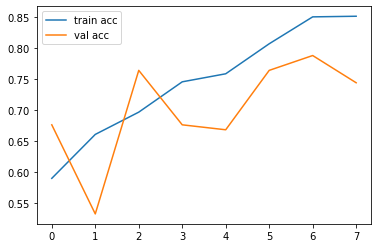

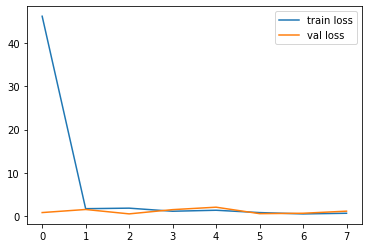

In [16]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [17]:
history.history

{'loss': [46.12849044799805,
  1.7550759315490723,
  1.878705620765686,
  1.1668133735656738,
  1.3958934545516968,
  0.8564308881759644,
  0.5503529906272888,
  0.7018623948097229],
 'accuracy': [0.5895000100135803,
  0.6604999899864197,
  0.6965000033378601,
  0.7455000281333923,
  0.7584999799728394,
  0.8069999814033508,
  0.8504999876022339,
  0.8514999747276306],
 'val_loss': [0.8628745675086975,
  1.571358323097229,
  0.5594949126243591,
  1.536991000175476,
  2.1013145446777344,
  0.6104898452758789,
  0.7026224732398987,
  1.1851874589920044],
 'val_accuracy': [0.6759999990463257,
  0.5320000052452087,
  0.7639999985694885,
  0.6759999990463257,
  0.6679999828338623,
  0.7639999985694885,
  0.7879999876022339,
  0.7440000176429749]}

In [18]:
model.evaluate(test_x,test_y,batch_size=32)

8/8 [==============================] - 10s 1s/step - loss: 0.9419 - accuracy: 0.7849


[0.9418532848358154, 0.7848605513572693]

In [19]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_pred,test_y)

0.7848605577689243

In [21]:
recall_score(y_pred,test_y)

0.6752136752136753

In [22]:
precision_score(y_pred,test_y)

0.8315789473684211

In [23]:
f1_score(y_pred,test_y)

0.7452830188679246

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

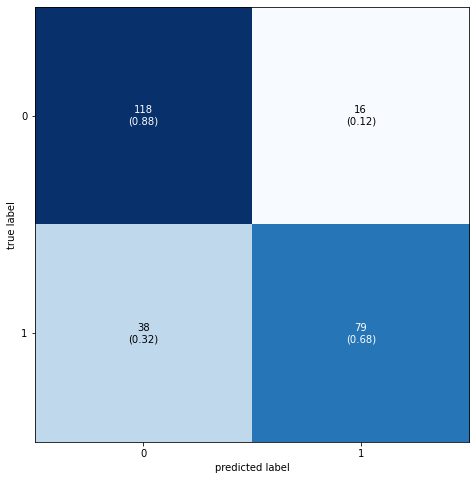

In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred,test_y)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8),show_normed=True)

In [25]:
model.save(filepath='C:/Users/atulp/OptimizersBrainStroke/Inceptionv3 Model/Inceptionv3 RMSprop/Inceptionv3modelAugmented.h5')

In [39]:
import cv2
from tensorflow.keras.preprocessing import image
opt = Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

#load the image you want to classify

image = cv2.imread("C:/Users/atulp/Optimizers Brain Stroke/Brain Stroke DATA/test/Stroke/ (23).jpg")

image = cv2.resize(image, (299,299))

plt.imshow(image)

#predict the image

preds = model.predict(np.expand_dims(image, axis=0))[0]

print('Predicted Label',preds)

#model.predict("C:/Users/atulp/Optimizers Brain Stroke/Brain Stroke DATA/test/Stroke/69 (2).jpg")



error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Not Stroke


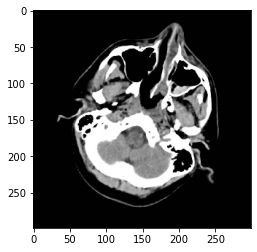

In [26]:
import cv2
from tensorflow.keras.preprocessing import image

img = image.load_img("C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/Stroke/83 (11).jpg",target_size=(299,299))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model("C:/Users/atulp/OptimizersBrainStroke/Inceptionv3 Model/Inceptionv3 Adagrad/Inceptionv3modelAugmented.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Stroke")
else:
    print('Not Stroke')

ValueError: Unknown initializer: GlorotUniform

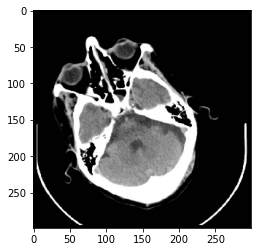

In [42]:
from keras.preprocessing import image
img = image.load_img("C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/Stroke/92 (12).jpg",target_size=(299,299))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("C:/Users/atulp/OptimizersBrainStroke/Inceptionv3 Model/Inceptionv3 Adam/Inceptionv3modelAugmented.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Stroke")
else:
    print('Not Stroke')